In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
df = pd.read_csv('cars.csv', sep='	')
df = df.drop('Unnamed: 5', 1)
df.head()

C:\Users\lucas\AppData\Local\Temp/ipykernel_8060/3336978003.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Unnamed: 5', 1)


,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [3]:
df.shape

(36, 5)

In [4]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [5]:
X = df[['Weight', 'Volume']]
y = df['CO2']

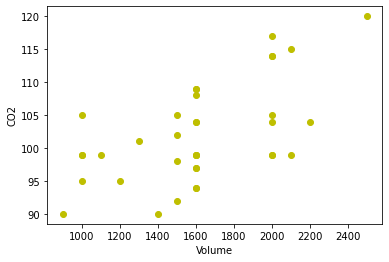

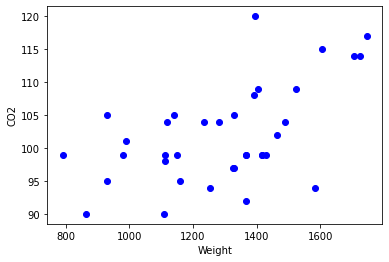

In [6]:
plt.scatter(X['Volume'], y, color='y')
plt.xlabel('Volume')
plt.ylabel('CO2')
plt.show()

plt.scatter(X['Weight'], y, color='b')
plt.xlabel('Weight')
plt.ylabel('CO2')
plt.show()

In [7]:
car_values = [X['Weight'], X['Volume']]

print('Weight and Volume prediction, respectively:')
for i in car_values:
    slope, intercept, r, p, std_err = stats.linregress(i, y)
    #slope, intercept, r, p, std_err = stats.linregress(X['Volume'], y)

    def myfunc(x):
        return slope * x + intercept

    co2 = myfunc(1600)
    print(co2)

Weight and Volume prediction, respectively:
107.25897388646379
101.90169953839697


In [8]:
# Dividing the data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# Training the data:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
# Seeing the coefficient:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Weight,0.007290
Volume,0.007625


In [11]:
# Making predictions:
y_pred = regressor.predict(X_test)

In [12]:
# Comparing the actual values to the predicted values:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
31,117,108.549002
20,94,104.318040
16,99,102.721611
30,115,108.283675
22,99,106.534163
15,97,102.466474
10,99,96.102551
2,95,94.968269


In [13]:
# Evaluating the algorithm's performance:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.642098903028479
Mean Squared Error: 41.485363072660505
Root Mean Squared Error: 6.44091321728996
